# Test Notebook for developments of proper steering for nifty+maria

2024-11-22 15:26:11.076 INFO: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2024-11-22 15:26:11.078 INFO: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


Initialising...


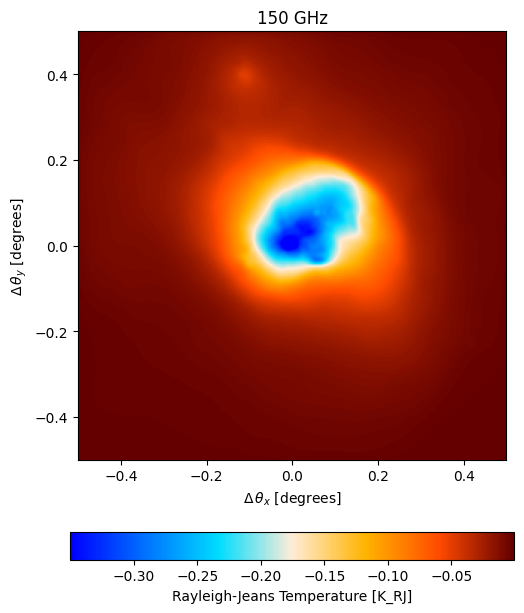

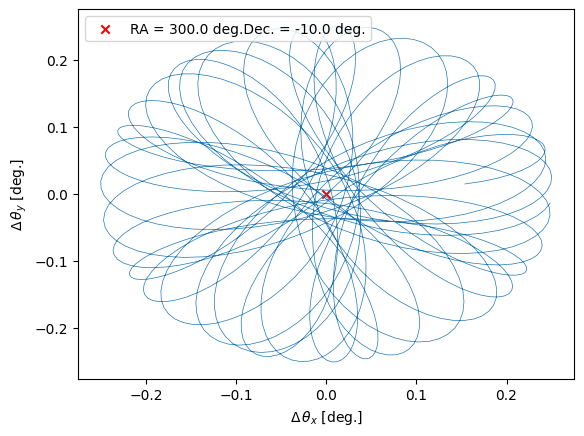

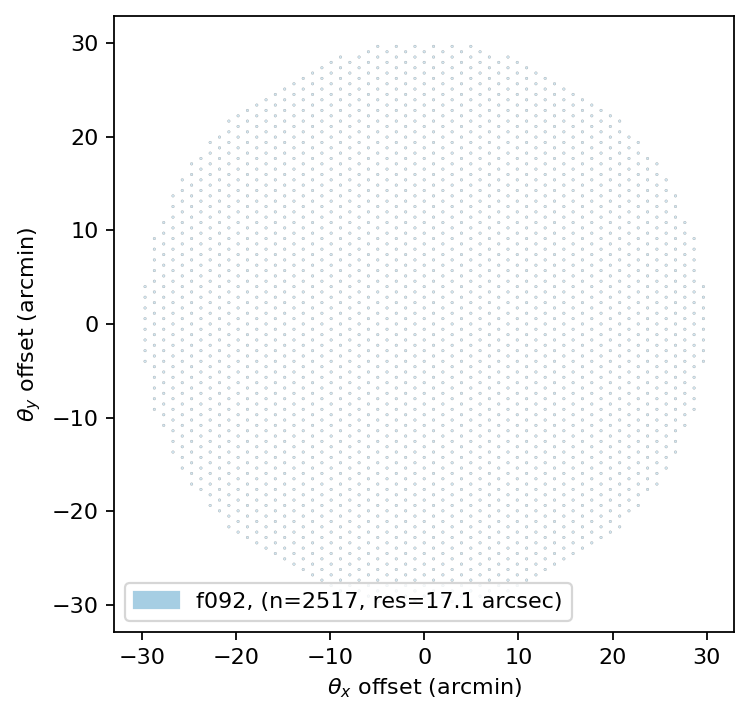

In [1]:
from nifty_maria.FitHandler import FitHandler

fit = FitHandler()

In [2]:
fit.simulate()

2024-11-22 15:26:13.242 INFO: Initialized base in 976 ms.
Building atmosphere: 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]
2024-11-22 15:26:17.046 INFO: Initialized atmosphere in 3793 ms.
Generating noise: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


Running mapper (f092): 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


mapdata_truth shape: (1, 1, 1000, 1000)
mapdata_truth mean: -0.029448908513921526


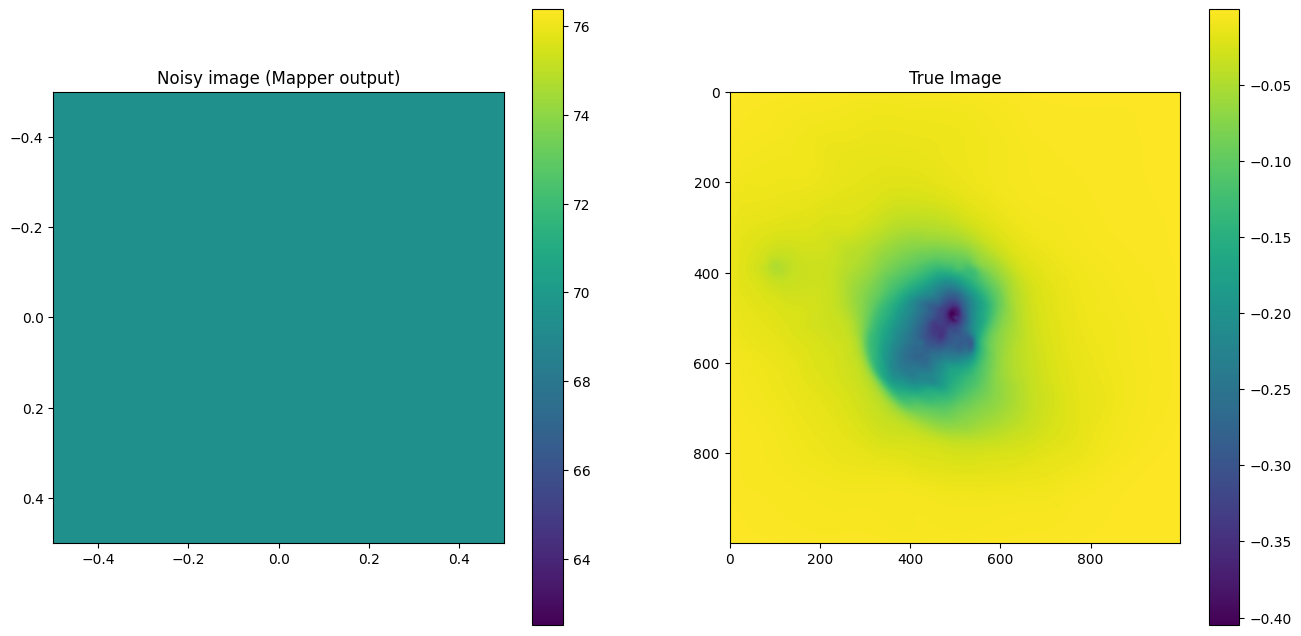

In [3]:
fit.reco_maria()

# JAX

In [4]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '2'

# # Set JAX to preallocate 90% of the GPU memory
# os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.9"

# # Disable default memory preallocation strategy for more control
# os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

# Use platform-specific memory allocation for CUDA
# os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"

# import jax
# from jax import random
# import jax.numpy as jnp

# import nifty8.re as jft
# import matplotlib.pyplot as plt

# import numpy as np

# from functools import reduce
# from operator import or_

# seed = 42
# key = random.PRNGKey(seed)

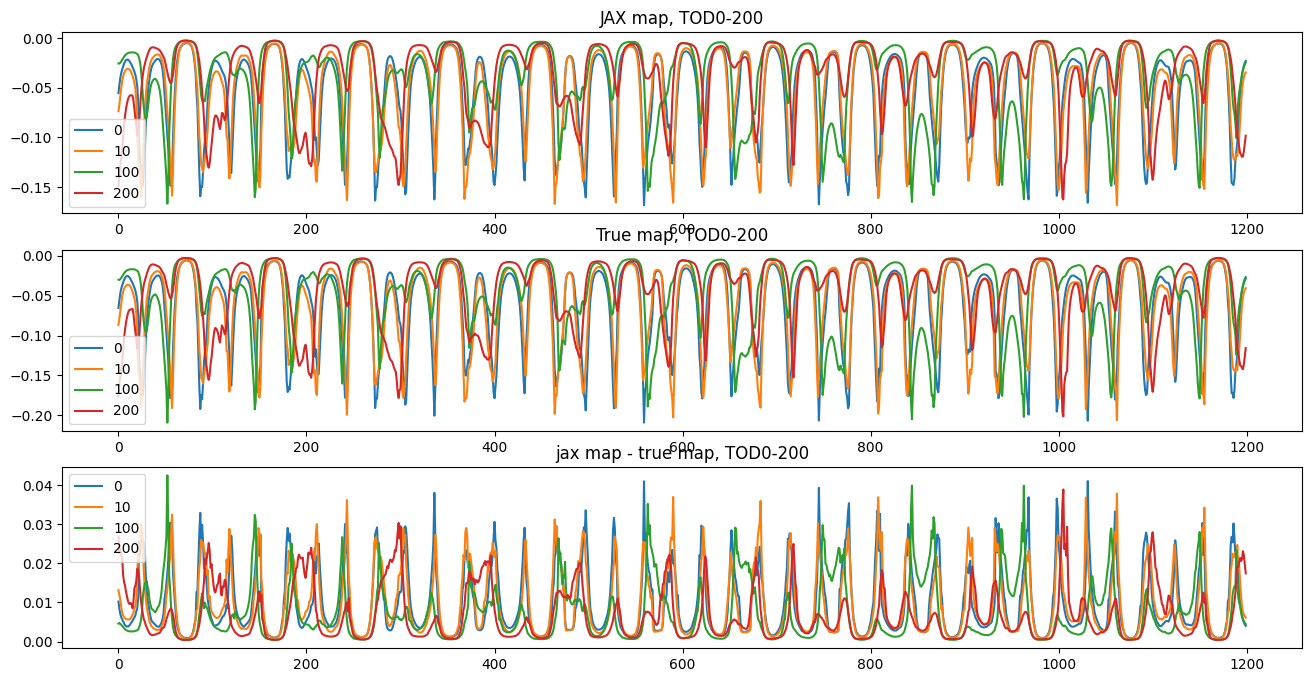

Noise stddev: 0.00010480253628986074


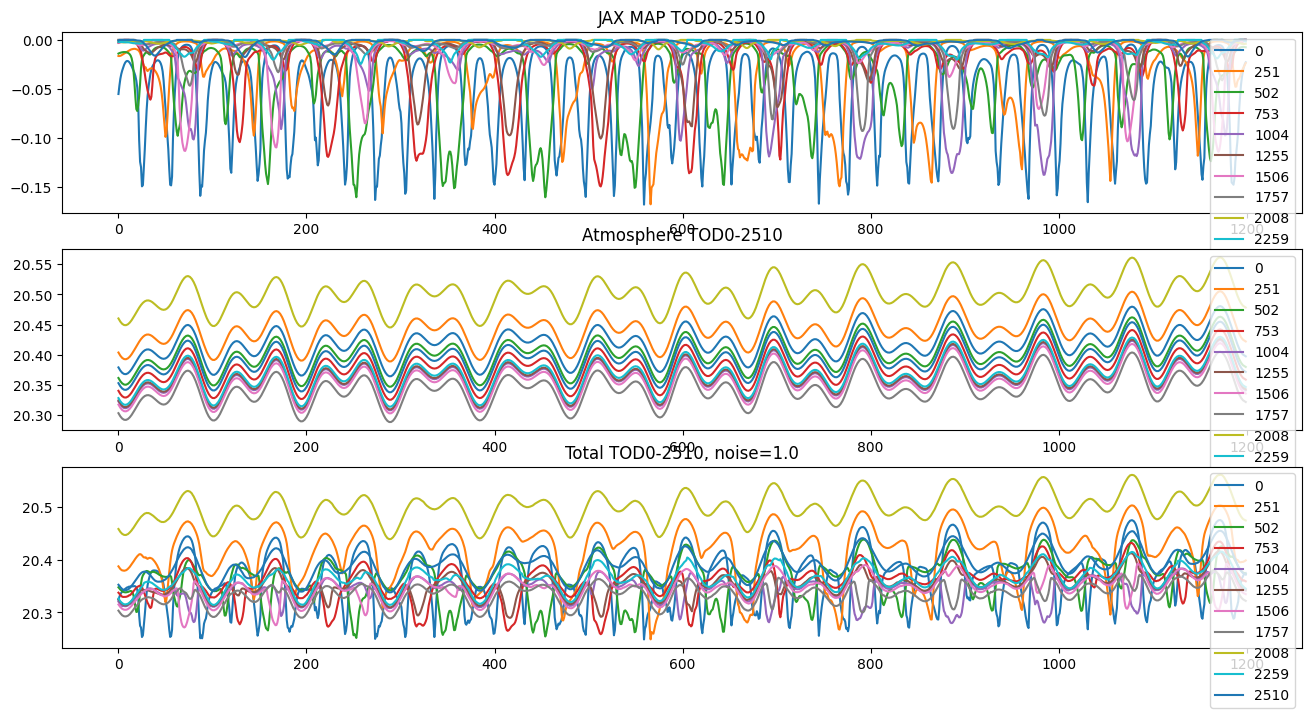

In [5]:
fit.sample_jax_tods()

In [6]:
fit.init_gps()

assuming a diagonal covariance matrix;
setting `std_inv` to `cov_inv(ones_like(data))**0.5`


(2, 2517)


(2517, 1200)


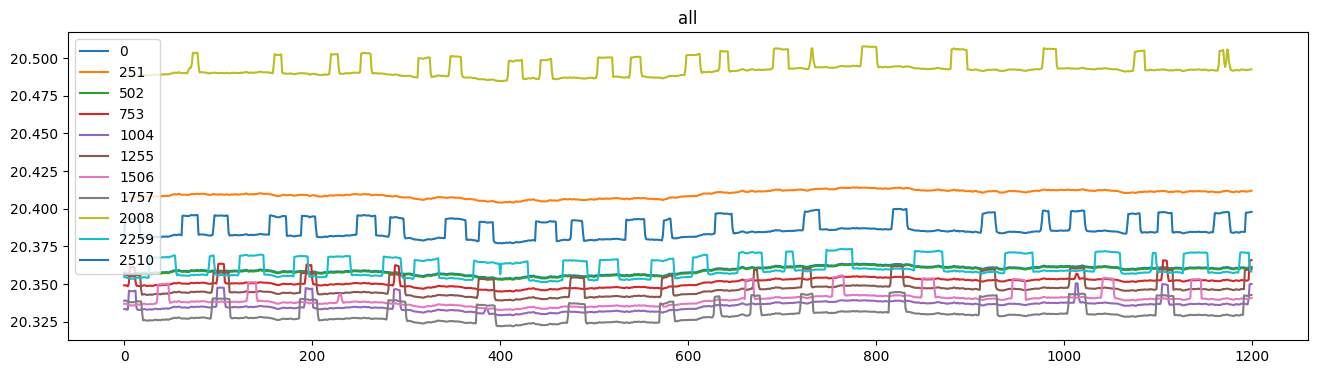

In [7]:
fit.draw_prior_sample()

In [8]:
samples, state = fit.perform_fit()

OPTIMIZE_KL: Starting 0001
M: →:1.0 ↺:False #∇²:06 |↘|:2.179299e+03 ➽:1.031306e+02
M: Iteration 1 ⛰:+3.385703e+10 Δ⛰:2.010084e+10
M: →:0.5 ↺:False #∇²:12 |↘|:1.742318e+02 ➽:1.031306e+02
M: Iteration 2 ⛰:+3.217386e+10 Δ⛰:1.683177e+09
M: →:0.0625 ↺:False #∇²:18 |↘|:1.379835e+02 ➽:1.031306e+02
M: Iteration 3 ⛰:+3.148770e+10 Δ⛰:6.861582e+08
M: →:0.125 ↺:False #∇²:24 |↘|:3.510694e+02 ➽:1.031306e+02
M: Iteration 4 ⛰:+2.926433e+10 Δ⛰:2.223364e+09
M: →:0.5 ↺:False #∇²:30 |↘|:1.541743e+03 ➽:1.031306e+02
M: Iteration 5 ⛰:+2.412470e+10 Δ⛰:5.139637e+09
M: →:0.25 ↺:False #∇²:36 |↘|:9.381272e+02 ➽:1.031306e+02
M: Iteration 6 ⛰:+1.042003e+10 Δ⛰:1.370467e+10
M: →:1.0 ↺:False #∇²:42 |↘|:5.885803e+02 ➽:1.031306e+02
M: Iteration 7 ⛰:+5.829740e+09 Δ⛰:4.590290e+09
M: →:1.0 ↺:False #∇²:48 |↘|:1.750138e+02 ➽:1.031306e+02
M: Iteration 8 ⛰:+4.761868e+09 Δ⛰:1.067872e+09
M: →:1.0 ↺:False #∇²:54 |↘|:3.538979e+02 ➽:1.031306e+02
M: Iteration 9 ⛰:+4.743079e+09 Δ⛰:1.878869e+07
M: →:1.0 ↺:False #∇²:62 |↘|:6.203588e+02

In [9]:
fit.printfitresults(samples)

Fit Results (res, init, std)

TODs:
	fluctuations: 0.0038329131763641827, 0.01, 0.003
	loglogvarslope: -0.272477432986036, -2.2, 0.2
	zeromode std (LogNormal): 1.7049048273969436e-05, 5e-05, 4e-05
map:
	fluctuations: 10.4073846573246, 0.0001, 1e-05
	loglogvarslope: 1.198610435021826, -3.0, 0.1
	zeromode std (LogNormal): 2.0153552711258537e-06, 2e-06, 1e-07


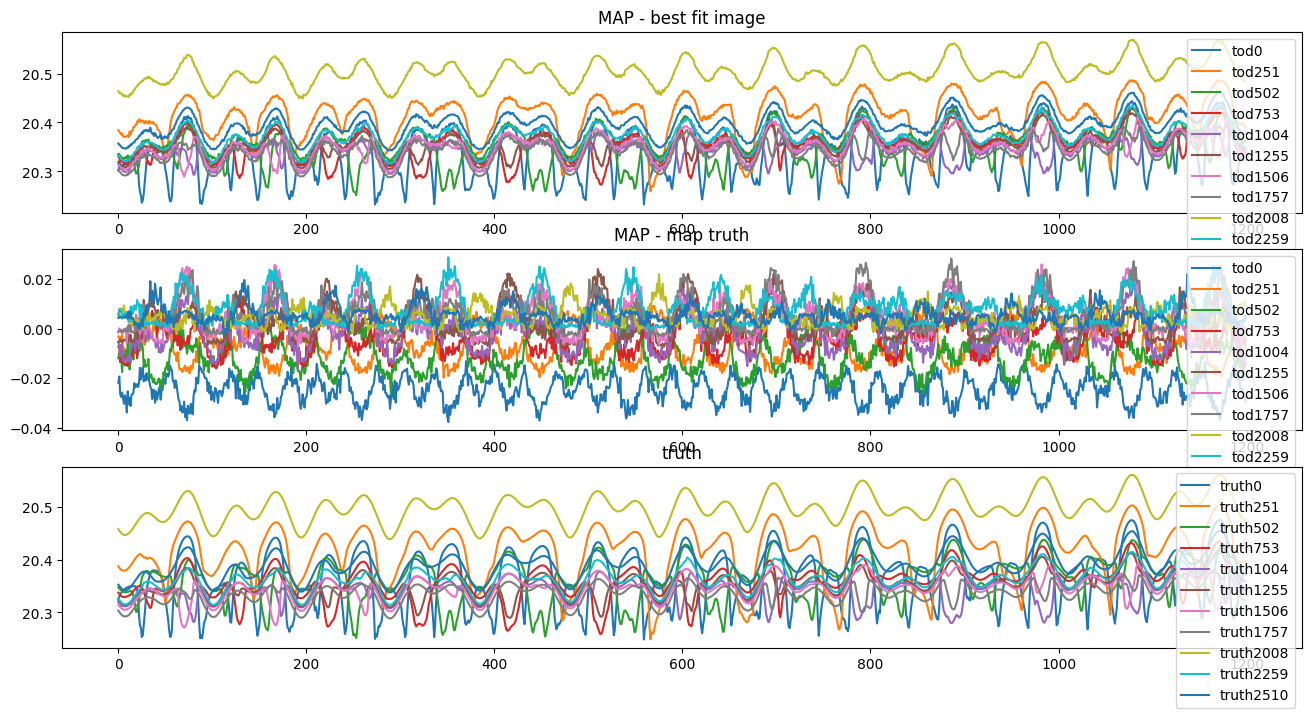

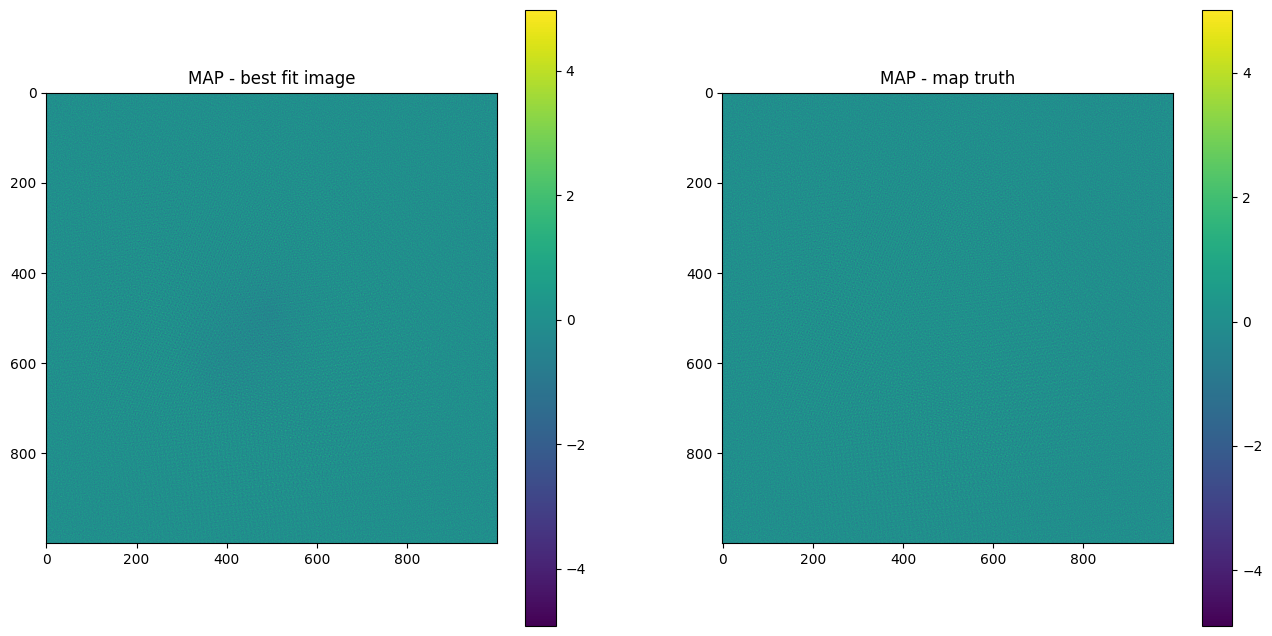

In [10]:
fit.plotfitresults(samples)

In [11]:
samples, state = fit.perform_fit(n_it=2, fit_type='full', printevery=4)

OPTIMIZE_KL: Starting 0001
SL: Iteration 0 ⛰:+2.8474e+09 Δ⛰:inf ➽:1.0313e+01
SL: Iteration 1 ⛰:+4.7966e+08 Δ⛰:2.3678e+09 ➽:1.0313e+01
SL: Iteration 2 ⛰:+1.9055e+08 Δ⛰:2.8911e+08 ➽:1.0313e+01
SL: Iteration 3 ⛰:+8.6503e+07 Δ⛰:1.0405e+08 ➽:1.0313e+01
SL: Iteration 4 ⛰:+3.8558e+07 Δ⛰:4.7945e+07 ➽:1.0313e+01
SL: Iteration 5 ⛰:+2.5844e+07 Δ⛰:1.2714e+07 ➽:1.0313e+01
SL: Iteration 6 ⛰:+1.2275e+07 Δ⛰:1.3569e+07 ➽:1.0313e+01
SL: Iteration 7 ⛰:+9.0709e+06 Δ⛰:3.2037e+06 ➽:1.0313e+01
SL: Iteration 8 ⛰:+9.0428e+06 Δ⛰:2.8089e+04 ➽:1.0313e+01
SL: Iteration 9 ⛰:+6.7627e+06 Δ⛰:2.2802e+06 ➽:1.0313e+01
SL: Iteration 10 ⛰:+5.0531e+06 Δ⛰:1.7095e+06 ➽:1.0313e+01
SL: Iteration 11 ⛰:+4.1335e+06 Δ⛰:9.1958e+05 ➽:1.0313e+01
SL: Iteration 12 ⛰:+4.0635e+06 Δ⛰:6.9975e+04 ➽:1.0313e+01
SL: Iteration 13 ⛰:+3.0595e+06 Δ⛰:1.0040e+06 ➽:1.0313e+01
SL: Iteration 14 ⛰:+2.0976e+06 Δ⛰:9.6192e+05 ➽:1.0313e+01
SL: Iteration 15 ⛰:+2.0969e+06 Δ⛰:6.3748e+02 ➽:1.0313e+01
SL: Iteration 16 ⛰:+1.5953e+06 Δ⛰:5.0168e+05 ➽:1.0313e+01
SL: 

In [13]:
fit.printfitresults(samples)

Fit Results (res, init, std)

TODs:
	fluctuations: 0.07330446224745879, 0.01, 0.003
	loglogvarslope: -1.676987937411228, -2.2, 0.2
	zeromode std (LogNormal): 3.39042448442683e-05, 5e-05, 4e-05
map:
	fluctuations: 0.00010019960146958839, 0.0001, 1e-05
	loglogvarslope: -2.9982028560886986, -3.0, 0.1
	zeromode std (LogNormal): 2.00322700336659e-06, 2e-06, 1e-07


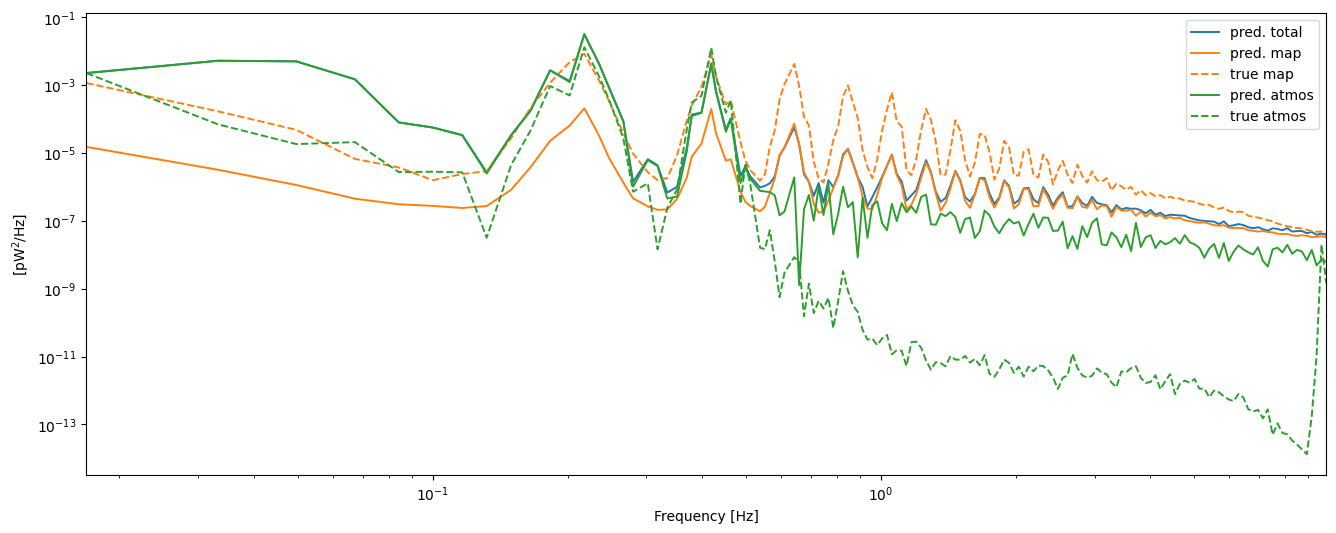

In [12]:
fit.plotpowerspectrum(samples)

# Extend det to two halves:

In [16]:
import jax.numpy as jnp
import nifty8.re as jft

samples.pos
initial_pos = {}
for k in samples.pos:
    if k == 'combcf xi':
        # initial_pos[k] = jax.numpy.broadcast_to(samples.pos['combcf xi'], (n, samples.pos['combcf xi'].shape[1])) # only works for one TOD
        initial_pos[k] = jnp.broadcast_to(samples.pos['combcf xi'], (2, samples.pos['combcf xi'].shape[1])) # only works for one TOD
        # for sub-circles
        # initial_pos[k] = jax.numpy.repeat(samples.pos['combcf xi'], -(-n//samples.pos['combcf xi'].shape[0]), axis=0)[:n]

        # For half-circles:
        # initial_pos[k] = jax.numpy.empty( (2, samples.pos['combcf xi'].shape[1]) )
        # initial_pos[k] = initial_pos[k].at[posmask_up].set( samples.pos['combcf xi'][0] )
        # initial_pos[k] = initial_pos[k].at[posmask_down].set( samples.pos['combcf xi'][-1] )

    else:
        initial_pos[k] = samples.pos[k]

initial_pos = jft.Vector(initial_pos)

print(initial_pos)
initial_pos['combcf xi'].shape

Vector(
	{'cfmapax1fluctuations': Array(0.06986563, dtype=float64),
	 'cfmapax1loglogavgslope': Array(0.01797144, dtype=float64),
	 'cfmapxi': Array([[-0.00557317,  0.87241239, -0.40998018, ...,  0.0694429 ,
	        -0.12308091,  0.07241163],
	       [ 0.04983576, -0.49548974,  0.45163916, ...,  0.03247141,
	        -0.00738335, -0.23222442],
	       [-0.01364831,  0.19150509, -0.18727091, ..., -0.07351706,
	         0.05516817,  0.08158267],
	       ...,
	       [ 0.12019138,  0.08004732, -0.08936575, ...,  0.08366238,
	         0.28483214, -0.03623933],
	       [-0.24069054,  0.36633574, -0.0525161 , ...,  0.05877006,
	         0.02495571, -0.0323667 ],
	       [ 1.19478194, -0.59820211,  0.14909032, ...,  0.13981909,
	         0.24122351, -0.22981251]], dtype=float64),
	 'cfmapzeromode': Array(0.05724856, dtype=float64),
	 'combcf tod fluctuations': Array(6.93256101, dtype=float64),
	 'combcf tod loglogavgslope': Array(2.61506031, dtype=float64),
	 'combcf xi': Array([[-0.0567789 ,

(2, 11200)